---
Stellen Sie bitte sicher, dass alles wie vorhergesehen läuft, bevor Sie dieses Übungsblatt abgeben. **Starten Sie den Kernel neu** (in der Menüleiste die Option Kernel$\rightarrow$Restart auswählen) und **validieren** Sie anschließend das Übungsblatt (in der Menüleiste auf Validate klicken) um Rückmeldung zu eventuellen fehlenden oder fehlerhaften Eingaben zu erhalten. 

Füllen Sie alle Stellen im Übungsblatt aus, welche entweder `DEIN CODE HIER` oder "DEINE ANTWORT HIER" enthalten. Geben Sie unterhalb Ihren vollständigen Namen an.

Wenn Sie Code-Bestandteile aus anderen Quellen (wie z.B. Stackoverflow) kopieren, dann machen sie den kopierten Code in ihrer Quellcodedatei kenntlich und fügen eine Referenz auf die Quelle als Kommentar hinzu.

Wenn Sie die Aufgaben in einer Gruppe erledigen, dann fügen Sie die Namen aller Gruppenmitglieder in der nachfolgende Zelle zu `Name` und zusätzlich als Kommentar am Anfang Ihrer Quellcodedatei hinzu.

---

In [1]:
NAME = "Biswas kc test"

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time
from sklearn import metrics

# Task 1 – Multivariate Linear Regression (10 points)

In this task, a multivariate linear regression should be implemented. For this, the **Wine Quality** dataset will be used. This dataset contains chemical and sensory properties of red and white wines. Each record includes **11 numerical features**, such as pH value, alcohol content, etc.

The **goal of the regression** is to predict the **wine quality** (`quality`). This is given as an integer value from **0 to 10** and is based on sensory evaluation by experts.

### Assignment

* **Part 1:** Multivariate linear regression with scikit-learn (6 points)
* **Part 2:** Regularization with scikit-learn (4 points)

<br>
<br>
First, the dataset is loaded, and an overview of the features and their statistics is displayed.


# Good Luck with the MockExamv2

The mock exam does **not** reflect the actual exam 1:1 in terms of scope or complexity. It is intended to give you an idea of how an exam is structured and what type of tasks you can expect.

### Points
- __Task 1:__ 10 Points (Linear and Polynomial Regression)
- __Task 2:__ 10 Points (Logistic Regression)
- __Task 3:__ 10 Points (Decision Trees)
- __Task 4:__ 10 Points (Support Vector Machines)
- __Task 5:__ 10 Points (Neural Networks)

**Total: 50 Points, but you only need 30 to get a 100% score**

### General Notes

- All materials (slides, scripts) are allowed, including your own solutions to the exercises.
- Communication with other students and/or AIs (ChatGPT & Co.) is strictly prohibited in any form and will result in a failing grade.
- Read the task thoroughly and completely before starting your work.
- Grading is based on the functionality of your solution on JupyterHub.
- Comment your code if suitable.


In [3]:
dataset = pd.read_csv('winequality.csv')
print(f"shape: {dataset.shape}")
dataset.describe()

shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
from sklearn.model_selection import train_test_split

x = dataset.drop('quality', axis=1)
y = dataset['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Part 1: scikit-learn (6 points)

Implement a multivariate linear regression to predict wine quality using scikit-learn.

* Define a regression model `regressor` of the class `LinearRegression` ([link to documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)).
* Train the model on the training data.


In [5]:
from sklearn.linear_model import LinearRegression

In [7]:
regressor = LinearRegression(normalize = True)

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


In [8]:
# Let's look at the result
print(f"Intercept: {regressor.intercept_}")
print(f"Coefficients: {regressor.coef_}")

Intercept: 34.99871062872122
Coefficients: [ 4.12835075e-02 -1.14952802e+00 -1.77927063e-01  2.78700036e-02
 -1.87340739e+00  2.68362616e-03 -2.77748370e-03 -3.15166657e+01
 -2.54486051e-01  9.24040106e-01  2.67797417e-01]


Determine the **Mean Squared Error (MSE)** and the **Mean Absolute Error (MAE)** on the test data. Store the values in the respective variables `mse` and `mae`.

**Note:** Use `metrics` from `sklearn`.


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Reference: https://stackoverflow.com/questions/66426928/how-to-calculate-mean-absolute-error-mae-and-mean-signed-error-mse-using-pan
mae = mean_absolute_error( y_test, y_pred)
mse = mean_squared_error( y_test, y_pred)

print(mae, mse)

0.46963309286611254 0.3844711978201252


In [10]:
print('Begin of automatic tests')
assert np.isscalar(mse), "MSE must be a scalar value"
assert np.isscalar(mae), "MAE must be a scalar value"

print('\033[1mAll public tests passed!\n \033[0m')

Begin of automatic tests
All public tests passed!
 


## Part 2: Regularization (4 points)

Implement a multivariate linear regression **with regularization** and find an optimal regularization parameter.

Use the `Ridge` class from `sklearn.linear_model` ([link to documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)).
`Ridge` is used very similarly to `LinearRegression` — you only need to specify the regularization parameter `alpha` ($\alpha$) when instantiating.

```
regression = Ridge(alpha=...)
```

Compared to our familiar regularization parameter $\lambda$, we have: $\alpha = \frac{\lambda}{2m}$.

Determine which value from ${0.2,0.5,0.6}$ is the best `alpha_opt` that **minimizes the MSE on the test data**.

### Note

* Use `Ridge` as the regression model.
* Use `metrics` from `sklearn` to compute the MSE.
* Define one regession model for each choice of `alpha_opt`
  * Define (with `alpha`) and train a `Ridge` regressor.
  * Compute the MSE on the test data.


In [11]:
from sklearn.linear_model import Ridge

In [22]:
alphas = [0.2, 0.5, 0.6]

alpha_opt_1 =  Ridge(alpha=alphas[0])
alpha_opt_2 =  Ridge(alpha=alphas[1])
alpha_opt_3 =  Ridge(alpha=alphas[2])


# train
alpha_opt_1.fit(x_train, y_train)
alpha_opt_2.fit(x_train, y_train)
alpha_opt_3.fit(x_train, y_train)

# evaluate MSE on test for each alpha
y_pred_1 = alpha_opt_1.predict(x_test)
y_pred_2 = alpha_opt_2.predict(x_test)
y_pred_3 = alpha_opt_3.predict(x_test)


## This should be the MSE and not the score as mentioned in the question
mse_1 = mean_squared_error(y_test, y_pred_1)
mse_2 = mean_squared_error(y_test, y_pred_2)
mse_3 = mean_squared_error(y_test, y_pred_3)

print("Test MSE by alpha",
      {alphas[0]: mse_1, alphas[1]: mse_2, alphas[2]: mse_3})


mses = np.array([mse_1, mse_2, mse_3])  # NumPy array

# argmin method returns the index of minimum value
best_idx = np.argmin(mses) 

# just to check above
print("mses:", [mses])
print("best_idx:", best_idx)

 # alpha at that index
alpha_opt = alphas[best_idx]            
print("The optimal alpha is:", alpha_opt)
# Above check which index in array mses has the minimum value

# if you also want train MSE for the chosen model
chosen_model = [alpha_opt_1, alpha_opt_2, alpha_opt_3][best_idx]
y_pred_train = chosen_model.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print("Train MSE at alpha_opt", mse_train)

Test MSE by alpha {0.2: 0.38259401668190507, 0.5: 0.38256731940935884, 0.6: 0.3825741256355938}
mses: [array([0.38259402, 0.38256732, 0.38257413])]
best_idx: 1
The optimal alpha is: 0.5
Train MSE at alpha_opt 0.42662012150062045


In [14]:
print('\033[1mNo public tests\n \033[0m')

No public tests
 


# Iris Dataset

For the following three tasks, we will make use of the Iris dataset, among others.

The iris, also known as the sword lily, is a genus of plants with six subgenera and more than 200 species. We use the well-known Iris dataset, which contains the length and width of the sepals and petals, as well as the species of over 100 examined specimens.

|                   Iris setosa                   |                       Iris versicolor                       |                      Iris virginica                      |
| :---------------------------------------------: | :---------------------------------------------------------: | :------------------------------------------------------: |
| ![Iris-setosa](./Iris_setosa.jpg "Iris setosa") | ![Iris-versicolor](./Iris_versicolor.jpg "Iris versicolor") | ![Iris-virginica](./Iris_virginica.jpg "Iris virginica") |


In [15]:
with np.load('iris.npz') as data:
    X_train, y_train, = data['x_train'], data['y_train']
    X_test, y_test = data['x_test'], data['y_test']

The first five entries of
`X_train` (sepal_length, sepal_width, petal_length, petal_width) together with
`y_train`, i.e., the species.


In [16]:
df = pd.DataFrame(
    np.hstack((X_train, np.array([y_train]).T)), 
    columns=['sepal_length','sepal_width','petal_length','petal_width', 'species'],
)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,3.1,5.5,1.8,2.0
1,5.4,3.0,4.5,1.5,1.0
2,5.2,3.5,1.5,0.2,0.0
3,6.1,3.0,4.9,1.8,2.0
4,6.4,2.8,5.6,2.2,2.0


Summary of the dataset

In [17]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.880833,3.053333,3.815833,1.230833,1.041667
std,0.850437,0.431907,1.784904,0.776525,0.834103
min,4.300000,2.000000,1.100000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.500000,3.300000,5.200000,1.900000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


We can see that the training dataset contains 120 samples from three classes.

In [18]:
print('Shape von X_train:', X_train.shape)
print('Shape von y_train:', y_train.shape)

Shape von X_train: (120, 4)
Shape von y_train: (120,)


# Task 2 – Iris: Logistic Regression with scikit-learn (10 points)

### Assignment

Classify the Iris dataset using logistic regression. To do this, complete the functions `logmodel` and `logmodelreg`.


* **Part 1:** Implement the classifier `logmodel` using scikit-learn and specify the maximum number of iterations to be 500. (5 points)
* **Part 2:** Implement the classifier `logmodelreg`, where you implement a **very strong** regularization (and keep the maximum number of iterations at 500). (5 points)

**Note:** The [documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) might be helpful for this task...


In [24]:
from tensorflow.keras.utils import to_categorical
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

with np.load('iris.npz') as data:
    X_train, y_train, = data['x_train'], data['y_train']
    X_test, y_test = data['x_test'], data['y_test']

### Part 1: Implement the classifier `logmodel` and specify the maximum number of iterations to be 500. (5 Points)

In [25]:
logmodel= LogisticRegression(random_state=0, max_iter=500)
logmodel.fit(X_train,y_train)
logmodel.fit(X_test,y_test)

LogisticRegression(max_iter=500, random_state=0)

Here, we can see the accuracies on the training and test set, respectively.

In [26]:
train_acc=logmodel.score(X_train,y_train)
test_acc=logmodel.score(X_test,y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

Train Accuracy: 0.9417
Test Accuracy:  0.9667


In [27]:
print('Begin of automatic tests')
assert np.isscalar(train_acc), "MSE must be a scalar value"
assert np.isscalar(test_acc), "MAE must be a scalar value"

print('\033[1mAll public tests passed!\n \033[0m')

Begin of automatic tests
All public tests passed!
 


### Part 2: Implement the classifier `logmodelreg`, with a very strong regularization (5 Punkte)
Keep the maximum number of iterations at 500 and answer the theoretical question below.

In [28]:
from sklearn.linear_model import RidgeClassifier

logmodelreg= RidgeClassifier(alpha=1.0, max_iter=500).fit(X_train,y_train)

Here, we can see the accuracies on the training and test set, respectively.

In [29]:
# DEINE ANTWORT HIER
train_acc_reg=logmodelreg.score(X_train,y_train)
test_acc_reg=logmodelreg.score(X_test,y_test)
print(train_acc_reg, test_acc_reg)

0.8583333333333333 0.8


Let the training and test accuracy for the second classifier be as follows:

```
Train Accuracy: 0.3667
Test Accuracy:  0.200
```

**Do you detect over- or underfitting? Justify your answer! (max. 3 sentences)**

**Double-click on "YOUR ANSWER HERE"**

Note: You should have obtained approximately these accuracies with `logmodelreg` above.

There is a underfitting. As train data is performing way better than the test data.

In [30]:
print('Begin of automatic tests')
assert np.isscalar(train_acc_reg), "MSE must be a scalar value"
assert np.isscalar(test_acc_reg), "MAE must be a scalar value"

print('\033[1mAll public tests passed!\n \033[0m')

Begin of automatic tests
All public tests passed!
 


# Task 3 – Iris Classification with Decision Trees (10 points)

In this task, you will implement an two decision trees to classify iris flowers.

### Assignment

* **Part 1:** Define and train a decision tree on the Iris dataset (5 points).
* **Part 2:** Define and train other decision trees with adapted hyperparameters (5 points).

**Note:** The [documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) might be helpful for this task...

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

with np.load('iris.npz') as data:
    X_train, y_train, = data['x_train'], data['y_train']
    X_test, y_test = data['x_test'], data['y_test']

### Part 1: Train Decision Tree (5 points)

Train an decision tree `tree` on the Iris training data. Use the following hyperparameters:

* max_depth=3
* min_sample_split=3
* min_samples_leaf=2

In [32]:
tree = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_split=3, min_samples_leaf=2)

# DEINE ANTWORT HIER
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=3,
                       random_state=0)

In [33]:
# Predict on training data
y_pred_train = tree.predict(X_train)
# Evaluate the model
print("Training Data Accuracy:", accuracy_score(y_train, y_pred_train))

# Predict on test data
y_pred = tree.predict(X_test)

# Evaluate the model
print("Test Data Accuracy:", accuracy_score(y_test, y_pred))

Training Data Accuracy: 0.9666666666666667
Test Data Accuracy: 0.9666666666666667


In [34]:
print('Begin of automatic tests')
assert np.isscalar(accuracy_score(y_train, y_pred_train)), " must be a scalar value"
assert np.isscalar(accuracy_score(y_test, y_pred)), " must be a scalar value"

print('\033[1mAll public tests passed!\n \033[0m')

Begin of automatic tests
All public tests passed!
 


### Part 2: Find Better Hyperparameters (5 points)

We can see that the decision tree is not perfect (neither of the accuracies is 100%).

Train an decision tree `tree_adapt` on the Iris training data with adapted hyperparameters:

* increase `max_depth`
* decrease `min_sample_split`
* decrease `min_samples_leaf`

In [35]:
tree_adapt = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=2, min_samples_leaf=1)

tree_adapt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [31]:
# Predict on training data
y_pred_train_adapt = tree_adapt.predict(X_train)
# Evaluate the model
print("Training Data Accuracy:", accuracy_score(y_train, y_pred_train_adapt))

# Predict on test data
y_pred_adapt = tree_adapt.predict(X_test)

# Evaluate the model
print("Test Data Accuracy:", accuracy_score(y_test, y_pred_adapt))

Training Data Accuracy: 1.0
Test Data Accuracy: 1.0


In [32]:
print('Begin of automatic tests')
assert np.isscalar(accuracy_score(y_train, y_pred_train_adapt)), " must be a scalar value"
assert np.isscalar(accuracy_score(y_test, y_pred_adapt)), " must be a scalar value"

print('\033[1mAll public tests passed!\n \033[0m')

Begin of automatic tests
All public tests passed!
 


# Task 4 – Iris Classification with Support Vector Machine (10 points)

In this task, you will implement an SVM to classify iris flowers.

### Assignment

* **Part 1:** Define and train an SVM on the Iris dataset (4 points)
* **Part 2:** Define and train a second SVM with adapted hyperparameters on the Iris dataset (3 points).
* **Part 3:** Determine the “better” SVM between the two variants. (3 points)

**Note:** The [documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) might be helpful for this task...

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [34]:
with np.load('iris.npz') as data:
    X_train, y_train, = data['x_train'], data['y_train']

### Part 1: Train SVM (4 points)

Train an SVM `svm` on the Iris training data. Use the following hyperparameters:

* C = 1
* Polynomial kernel with degree 4
* $\gamma=0.1$


In [35]:
svm = SVC(kernel='linear', C=1, degree=4, gamma=0.1)
print(svm)
svm.fit(X_train, y_train)

SVC(C=1, degree=4, gamma=0.1, kernel='linear')


SVC(C=1, degree=4, gamma=0.1, kernel='linear')

In [36]:
print('Begin of automatic tests')
assert isinstance(svm, SVC), "svm is not a SVC instance"
assert accuracy_score(y_train, svm.predict(X_train)) > 0.9, "Training accuracy is too low"
assert accuracy_score(y_test, svm.predict(X_test)) > 0.9, "Test accuracy is too low"
print('\033[1mAll public tests passed!\n \033[0m')

Begin of automatic tests
All public tests passed!
 


The training and test accuracy are computed as follows:

In [37]:
train_acc = accuracy_score(y_train, svm.predict(X_train))
test_acc = accuracy_score(y_test, svm.predict(X_test))

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

Train Accuracy: 0.9750
Test Accuracy:  1.0000


### Part 2: Train second SVM (3 points)

Train an SVM `svmmod` on the Iris training data. Use either a different kernel and/or adapt the $\gamma$ hyperparameter, such that `svmmod` achieves 100% accuracy on the training set.

**Note:** The [documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) might be helpful for this task...

In [38]:
from sklearn.metrics import confusion_matrix
M = confusion_matrix(y_train, svm.predict(X_train))

In [39]:
svmmod = SVC(kernel='rbf', C=1, degree=4, gamma=10.5)

svmmod.fit(X_train, y_train)

SVC(C=1, degree=4, gamma=0.1, kernel='linear')


SVC(C=1, degree=4, gamma=10.5)

In [40]:
train_acc_mod = accuracy_score(y_train, svmmod.predict(X_train))
test_acc_mod = accuracy_score(y_test, svmmod.predict(X_test))

print(f"Train Accuracy of modified SVM: {train_acc_mod:.4f}")
print(f"Test Accuracy:  {test_acc_mod:.4f}")

Train Accuracy of modified SVM: 1.0000
Test Accuracy:  0.9333


In [41]:
print('Begin of automatic tests')
assert np.isscalar(train_acc_mod), "Accuracy (acc) is not scalar!"

assert 0 <= train_acc_mod <= 1, "Accuracy has to be between 0 and 1."
print('\033[1mAll public tests passed!\n \033[0m')


Begin of automatic tests
All public tests passed!
 


### Part 3 (3 points):

Let the training and test accuracy for the two SVMs be as follows:

```
SVM1
Train Accuracy: 0.9750
Test Accuracy:  1.0000

SVM2
Train Accuracy: 1.0000
Test Accuracy:  0.9750
```

**Which SVM is (slightly) preferable? Justify your answer! (max. 3 sentences)**

**Double-click on "YOUR ANSWER HERE"**

Note: You should have obtained these or similar accuracies of SVM1 and SVM2 above.


## Answer
* SVM1 is prefereable as SVM2 has accuracy of 100 percent which indicates over-fitting.

# Task 5 – Neural Networks (10 points)

### Assignment

* **Part 1:** Normal, fully connected (dense) neural network for classifying MNIST handwritten digits. (5 points)
* **Part 2:** Convolutional neural network for MNIST classification. (5 points)


In [42]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, Flatten

## Part 1 (5 points):

Create a fully connected neural network `mlp` for classifying MNIST digits. Use the given architecture and implement the network using `keras`.


The following sizes are given:

* 1 Input layer, appropriate for MNIST
* 1 dense layers with 256 neurons and activation function `relu`.
* 1 dense layer with 128 neurons and activation funciton `relu`.
* 1 dense layer with 64 neurons and activation funciton `relu`.
* The output layer (with the right amount of neurons \[how many classes do we have?\]), which uses `softmax` as the activation function.


In [43]:
# loading the data

with np.load("mnist.npz") as f:
    X_train, y_train = f["x_train"], f["y_train"]
    X_test, y_test = f["x_test"], f["y_test"]
    


Just a reminder, how the MNIST dataset looks like:

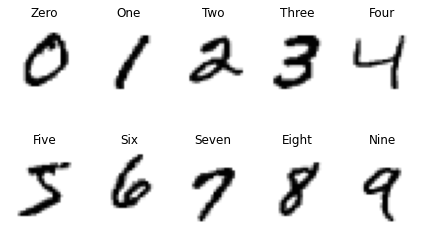

In [44]:
labels = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

_, positions = np.unique(y_train, return_index=True)
images = X_train[positions]

fig, axes = plt.subplots(2,5) # Prepares a 2x5 empty plot
for ax, image, label in zip(axes.flatten(), images, labels):
    ax.imshow(image, cmap="binary")
    ax.set_title(label) 
    ax.axis('off')
plt.tight_layout(pad=1)

In [45]:
# data preparation
X_train = X_train / 255
X_test  = X_test / 255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

X_train_mlp = X_train.reshape(len(X_train), -1) / 255
X_test_mlp  = X_test.reshape(len(X_test), -1) / 255

print(X_train_mlp.shape)
if X_train.ndim == 3:
    X_train = X_train[:,:,:,np.newaxis]
if X_test.ndim == 3:
    X_test = X_test[:,:,:,np.newaxis]

(60000, 784)


In [ ]:
mlp = Sequential([
    # DEINE ANTWORT HIER
     Input(shape=(28*28,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
print('Begin of automatic tests')
assert isinstance(mlp, Sequential), "mlp is not a Sequential instance"
#assert accuracy_score(y_train, svm.predict(X_train)) > 0.9, "Training accuracy is too low"
#assert accuracy_score(y_test, svm.predict(X_test)) > 0.9, "Test accuracy is too low"
print('\033[1mAll public tests passed!\n \033[0m')

In the following cell, the MLP is trained:

In [ ]:
mlp.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

mlp.fit(X_train_mlp, y_train, batch_size=256, epochs=10)

Now we calculate the test accuracy and display it:

In [ ]:
test_loss, test_acc = mlp.evaluate(X_test_mlp, y_test)
print("\nTest Accuracy (ccn):", test_acc)

## Part 2 (5 points):

Define a convolutional neural network `cnn` with one 2D convolution and one hidden layer for classifying MNIST images.

Implement the following architecture:

* 1 convolutional layer with 8 kernels.
* Flatten between the convolution and the hidden layer.
* Hidden layer with 256 neurons.
* The convolution and hidden layer use ReLU as the activation function.
* The output layer uses softmax as the activation function.

Determine the following:

* Choose sensible values for `kernel_size` and `strides`.
 * **Note:** [This documentation](https://keras.io/api/layers/convolution_layers/convolution2d/) should help you.


In [ ]:
cnn = Sequential()
cnn.add(Conv2D(8, kernel_size=(3,3), strides=(1,1),
               activation="relu", input_shape=(28,28,1)))
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))



In [51]:
assert len(cnn.weights) == 6, "Unexpected number of weight tensors"
print('\033[1mAll public tests passed!\n\033[0m')


All public tests passed!



In the following cell, the CNN is trained:

In [52]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, batch_size=256, epochs=10)

Epoch 1/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0068 - accuracy: 0.9980
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0038 - accuracy: 0.9992
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0036 - accuracy: 0.9989
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0020 - accuracy: 0.9997
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0015 - accuracy: 0.9996
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 4.5283e-04 - accuracy: 0.9999
Epoch 8/10
235/235 [==============================] - 2s 9ms/step - loss: 1.4952e-04 - accuracy: 1.0000
Epoch 9/10
235/235 [==============================] - 2s 9ms/step - loss: 1.2412e-04 - accuracy: 1.0000
Epoch 10/10
235/235 [==============================] - 2s 9ms/step - loss: 7.0583e-05 - 

Now we calculate the test accuracy and display it:

In [61]:
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print("\nTest Accuracy (ccn):", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0526 - accuracy: 0.9851

Test Accuracy (ccn): 0.9850999712944031
